 # Machine Learning LAB 1 (course 2020/21, P. Zanuttigh, M. Toldo) 

The notebook contains some simple tasks to be performed about classification and regression. Complete all the required code sections and answer to all the questions.

## 1) Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!

### Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb

Student name: Campesan Giulia
ID Number: 1161495 (bachelor id)

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the Kaggle dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains 3 features, the height, the weight and the age.

From Wikipedia (if you are not a basketball fan!!):

The Center (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

Point Guards (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
seed = 1
np.random.seed(seed)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 70% tranining 30% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:

filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) 
print(header)

dataset = list(NBA)

for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:4] 
Y = dataset[:,0] 


Y = Y*2-1 

m = dataset.shape[0]
print(m)
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]


['Position', 'Height cm', 'kg', 'Age']
260


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (70% of the data in the first set, 30% in the second one)

In [4]:

m_training = int ( m * 0.7 ) 
m_test = int ( m * 0.3 )



X_training = X[:m_training, :]
Y_training = Y[:m_training]

X_test = X[-m_test:, :]
Y_test = Y[-m_test:]


print(Y_training) 
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1
 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1
  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1
 -1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1]
78
Shape of training set: (182, 3)
Shape of test set: (78, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:

X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))



**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:


def perceptron_update(current_w, x, y):
    
    
    new_w = current_w + y * x
    

    return new_w



def perceptron(X, Y, max_num_iterations):
    
    curr_w = np.zeros(np.size(X_training, 1))
    best_w = np.zeros(np.size(X_training, 1))
    num_samples = len(X_training)
    best_error = 1
    vec_error = [] 
    index_misclassified = 0
    num_misclassified = 0
    
    
    
    num_iter = 0
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
        
       
        permutation = np.random.permutation(num_samples)
        X = X[permutation]
        Y = Y[permutation]
       
        
        for i in range(num_samples):
            
                      
            if ( Y[i] * np.dot ( X[i, :], curr_w )  <= 0 ):
                

            
                num_misclassified += 1
                index_misclassified = i
                
           
        error =  num_misclassified / num_samples
        vec_error.append(error)
       
        if  ( error ) < best_error:
            best_error = error
            best_w = curr_w
            
        
    
        num_iter += 1
        
        
        
        curr_w = perceptron_update( curr_w, X[index_misclassified], Y[index_misclassified] )
    
    
    return best_w, best_error, vec_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:

w_found, error, vec_error100 = perceptron(X_training,Y_training, 100)
print(w_found)
print("Training Error of perpceptron (100 iterations): " + str(error))

[  -6. -319.  684. -202.]
Training Error of perpceptron (100 iterations): 0.09340659340659341


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
num_errors = 0


for i in range( len( X_test ) ):
    predicted_label = np.sign ( np.dot ( w_found, X_test[i, :] ))
    
    if predicted_label != Y_test[i]:
        num_errors += 1
        


true_loss_estimate = num_errors/m_test  
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.14102564102564102


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

Training Error of perpceptron (100 iterations): 0.09340659340659341

Test Error of perpceptron (100 iterations): 0.14102564102564102

We have that test error is about 150% of training error, so the expectation to have a larger error on test set is satisfied

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:

w_found, error, vec_error3000 = perceptron(X_training,Y_training, 3000)
print(w_found)
print("Training Error of perpceptron (3000 iterations): " + str(error))


num_errors = 0

for i in range( len( X_test ) ):
    predicted_label = np.sign ( np.dot ( w_found, X_test[i, :] ))
    
    if predicted_label != Y_test[i]:
        num_errors += 1
        


true_loss_estimate = num_errors/m_test 
print("Test Error of perpceptron (3000 iterations): " + str(true_loss_estimate))

[  -2. -191.  405.  -47.]
Training Error of perpceptron (3000 iterations): 0.06043956043956044
Test Error of perpceptron (3000 iterations): 0.11538461538461539


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

Training Error of perpceptron (100 iterations): 0.09340659340659341

Test Error of perpceptron (100 iterations): 0.14102564102564102

Training Error of perpceptron (3000 iterations): 0.06043956043956044

Test Error of perpceptron (3000 iterations): 0.11538461538461539


The test error is still larger than the training error, as we would expect.
As we can see, increasing the number of iterations returns better accuracy both on the training and the test sets

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (70%-30%) and add a 1 as first component to each sample.

In [11]:
m_training = int ( m * 0.7 ) 


m_test = int ( m * 0.3 )




X_training = X[:m_training, :]
Y_training = Y[:m_training]

X_test = X[-m_test:, :]
Y_test = Y[-m_test:]


print(Y_training) 
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))


X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

[ 1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1
  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1
  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1
 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1
 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1]
78
Shape of training set: (182, 3)
Shape of test set: (78, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:

logreg = linear_model.LogisticRegression(C=1e5) 
logreg.fit(X_training, Y_training)
train_predict = logreg.predict( X_training )



num_error_training = 0

for i in range(m_training):
    if train_predict[i] != Y_training[i]:
        num_error_training += 1
        
        
        
error_rate_training = num_error_training / m_training       



print("Error rate on training set: "+str(error_rate_training))


test_predict = logreg.predict( X_test )

num_error_test = 0

for i in range(m_test):
    if test_predict[i] != Y_test[i]:
        num_error_test += 1
        


error_rate_test = num_error_test / m_test
print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.07142857142857142
Error rate on test set: 0.07692307692307693


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:

features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']


index_feature1 = 0 
index_feature2 = 1
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]



X_training = X_reduced[:m_training, :]
Y_training = Y[:m_training]

X_test = X_reduced[-m_test:, :]
Y_test = Y[-m_test:]

Now learn a model using the training data and measure the performances.

In [14]:


logreg.fit( X_training, Y_training )
reduced_train_predict = logreg.predict(X_training)


test_predict = logreg.predict( X_test )

num_error_test = 0

for i in range(m_test):
    if test_predict[i] != Y_test[i]:
        num_error_test += 1
        

error_rate_test = num_error_test / m_test
print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.07692307692307693


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**
The performances obtained selecting all of the three features are:

Error rate on training set: 0.07142857142857142

Error rate on test set: 0.07692307692307693

Whereas selecting the two most significant features (height and weight) we obtain:

Error rate on test set: 0.07692307692307693

This highlight how age essentially isn't involved in data prediction since it has almost no correlation with the player role.

Whereas, if we choose e.g. to select height and age as the subset of features to train our algorithm, we obtain an error rate on test set: 0.28205128205128205, with  an error rate increase of about 400%: it shows that  choosing a subset of features that does not represent properly the correlation with the label will lead to 'casual' predictions, increasing error rate


If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

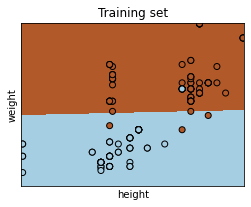

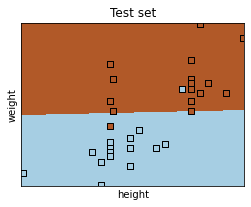

In [15]:


h = .02  
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading = 'auto')


plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')


plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

Dataset description: <br>
The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [16]:

%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [17]:


filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

dataDescription = stats.describe(Data)

print ("Shape of data array: " + str(Data.shape))


Shape of data array: (500, 14)


# Split data in training, validation and test sets



Given $m$ total data, denote with $m_{tv}$ the part used for training and validation. Keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$. For instance one can take $m_t=0.6m$ of the data as training, $m_{val}=0.2m$  validation and $m_{test}=0.2m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: When different model classes are present (e.g. of different complexity such as linear regression which uses a different number $d_j$ of regressors $x_1$,...$x_{d_j}$), one has to choose which one is the "best" complexity. In this simple example the validation set is not needed, but it is better to get used with it.
Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d_j: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (60%-20%-20%)

In [18]:

num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)


size_chunk = int (1 / 5 * num_total_samples)

print ("Size of each chunk of data: ", size_chunk)


np.random.shuffle(Data)
np.random.shuffle(Data)
np.random.shuffle(Data)

X_training = Data[:3*size_chunk, :-1]
Y_training = Data[:3*size_chunk, -1]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)


X_validation = Data[3*size_chunk: -size_chunk, 0:13]
Y_validation = Data[3*size_chunk: -size_chunk, 13]
print ("Validation input data size: ", X_validation.shape)
print ("Validation output data size: ", Y_validation.shape)


X_test = Data[-size_chunk:, 0:13] 
Y_test = Data[-size_chunk:, 13]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Size of each chunk of data:  100
Training input data size:  (300, 13)
Training output data size:  (300,)
Validation input data size:  (100, 13)
Validation output data size:  (100,)
Test input data size:  (100, 13)
Test output data size:  (100,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [19]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_training) 

X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_validation = scaler.transform(X_validation) 
print ("Mean of the validation input data:", X_validation.mean(axis=0))
print ("Std of the validation input data:", X_validation.std(axis=0))

X_test = scaler.transform(X_test) 
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [-3.85802501e-16 -1.18423789e-17  2.53454665e-15 -2.87547763e-16
 -1.84352533e-15  8.84847751e-16  1.47659662e-15  3.48239955e-16
 -4.44089210e-17 -1.54922371e-16  1.71375876e-14  3.72729625e-15
  3.07716815e-16]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the validation input data: [-0.10260765  0.03347005 -0.06774001 -0.03686049 -0.05282948  0.13489624
 -0.1084581   0.1544932  -0.03257196 -0.02564366 -0.04158065  0.12420671
 -0.06755974]
Std of the validation input data: [0.64442543 0.89019941 0.98620119 0.94048438 1.0770649  1.0296141
 1.03647502 1.07492873 0.96279793 0.96013915 0.93648701 0.83066232
 0.99945226]
Mean of the test input data: [-0.1454936   0.12617328  0.04499367 -0.14744196 -0.1500261  -0.02597775
 -0.12073367  0.07312458 -0.17409149 -0.0426103   0.00967695  0.08034404
 -0.13069137]
Std of the test input data: [0.63926286 1.22797317 1.11402363 0.72231512 0.96747068 0.92950327
 1.02397972 0.95671032

# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [20]:

m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) 

m_validation = X_validation.shape[0]
X_validationH = np.hstack((np.ones((m_validation,1)),X_validation)) 

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  


w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq ( X_trainingH, Y_training, rcond=None )
print("LS coefficients with numpy lstsq:", w_np)



RSStr_hand = np.power (np.linalg.norm(Y_training - np.dot (X_trainingH, w_np)), 2) 

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)
print("Empirical risk implemented through formula:",  RSStr_hand / m_training)

LS coefficients with numpy lstsq: [222.30666667 -10.17805401  11.23704346  -1.1457231   10.8825001
 -22.69385812  33.44501953  -0.97626883 -29.33216893  31.17284855
 -22.96919483 -20.88832116   9.9261344  -28.81626823]
RSS with numpy lstsq:  [630077.22137567]
Empirical risk with numpy lstsq: [2100.25740459]
Empirical risk implemented through formula: 2100.2574045855517


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS). 

**TO DO**: Compute these quantities on  training, validation and test sets.

In [21]:
prediction_training = np.dot(X_trainingH, w_np)
prediction_validation = np.dot(X_validationH, w_np)
prediction_test = np.dot(X_testH, w_np)


RSS_validation = np.power (np.linalg.norm(Y_validation - np.dot (X_validationH, w_np)), 2) 
RSS_test = np.power (np.linalg.norm(Y_test - np.dot (X_testH, w_np)), 2)

print("RSS on validation data:",  RSS_validation)
print("Loss estimated from validation data:", RSS_validation/m_validation)

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on validation data: 274210.1062613988
Loss estimated from validation data: 2742.1010626139882
RSS on test data: 225348.14997566733
Loss estimated from test data: 2253.481499756673


### QUESTION 4: Comment on the results you get and on the difference between the train, validation and test errors.

Loss estimated from training data: 2100.2574045855517

Loss estimated from validation data: 2742.1010626139882

Loss estimated from test data: 2253.481499756673

We can see that the loss on training data is smaller than the losses on validation and test sets, satisfying our expectations.
On the other hand, validation and test sets losses show no substantial difference (about 5%) since they are basically two test sub-sets, as we didn't use the validation set for any selection.



## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [22]:
from sklearn import linear_model


LinReg = sl.linear_model.LinearRegression().fit( X_training.reshape(-1, 13), Y_training.reshape(-1,1))



print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)


Y_training_linreg = LinReg.intercept_ + np.dot( X_training, LinReg.coef_.reshape(-1,1))
Y_test_linreg =  LinReg.intercept_ + np.dot( X_test, LinReg.coef_.reshape(-1,1))

print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: [222.30666667]
Least-Squares Coefficients: [[-10.17805401  11.23704346  -1.1457231   10.8825001  -22.69385812
   33.44501953  -0.97626883 -29.33216893  31.17284855 -22.96919483
  -20.88832116   9.9261344  -28.81626823]]
Measure on training data: 0.23270864425803728
